# Introduction

## Targets

***fit and find the fair implied vol***

***profitable options trading strategies***

## SABR Models

Hagan et al. (2002) proposed SABR model assuming that the forward price of underlying assets obeys the following SDE:

$$
\begin{equation}
\begin{cases}
    \frac{dF_{t}}{F_{t}^{\beta}}={\sigma}_{t}dW_{t},\\
    \frac{d{\sigma}_{t}}{{\sigma}_{t}}=\nu dZ_{t},\\
    dW_t dZ_t = \rho dt
\end{cases}
\end{equation}
$$
where $\beta_*=1-\beta$, and $\rho_* = \sqrt{1-\rho^2}$

Let $f_{t}=\frac{F_{t}}{F_{0}} \left(f_{0}=1\right), \quad k=\frac{K}{F_{0}}
\quad \hat{\sigma}_{t}=\frac{\sigma_{t}}{\sigma_{0}} \left(\hat{\sigma}_{0}=1\right)$, We have

$$
\begin{equation}
\begin{cases}
    \frac{d f_{t}}{f_{t}^{\beta}}=\alpha \hat{\sigma}_{t} d W_{t},\\
    \frac{d \hat{\sigma}_{t}}{\hat{\sigma}_{t}}=\nu d Z_{t}, \
    \quad \text{where}\ \alpha=\frac{\sigma_{0}}{F_{0}^{\beta_*}}
\end{cases}
\end{equation}
$$

Firstly, Hagan, et al. (2002) derive the normal implied volatility as following,

$$
\begin{equation}
    \frac{\sigma_{\mathrm{N}}}{\alpha}=\frac{\beta_{*}(k-1)}{k^{\beta *}-1} H(\zeta)\left(1+h_{\mathrm{N}} T\right)\
    \quad for \quad \zeta=\frac{\nu}{\alpha} \frac{k-1}{k^{\beta / 2}}\\    
\end{equation}
$$

where

$$
\begin{equation}
\begin{cases}
    h_{\mathrm{N}}=\frac{\beta_{*}^{2}-1}{24 k^{\beta *}} \alpha^{2}+\
    \frac{\rho \beta}{4 k^{\beta * / 2}} \alpha \nu+\frac{2-3 \rho^{2}}{24} \nu^{2}\\
    H(z)=\frac{z}{x(z)},\\
    x(z)=\log \left(\frac{V(z)+z+\rho}{1+\rho}\right),\\
    V(z)=\sqrt{1+2 \rho z+z^{2}}
\end{cases}
\end{equation}
$$


Finally, applying the expansion, they get the HKLW formula of the approx solution for the SABR model:

$$
\begin{equation}
    \frac{\sigma_{\mathrm{BS}}}{\alpha}=\frac{H\left(\zeta^{\prime}\right)}{k^{\beta_{*} / 2}}\
    \frac{1+\left(\frac{\beta_*^{2}}{24 k^{\beta_*}} \alpha^{2}+\frac{\rho \beta}{4 k^{\beta_* / 2}} \alpha \nu+\frac{2-3 \rho^{2}}{24} \nu^{2}\right) T}{1+\frac{\beta_{*}^{2}}{24} \log ^{2} k+\frac{\beta_*^{4}}{1920} \log ^{4} k}\
    \quad for \quad \zeta^{\prime}=\frac{\nu}{\alpha} k^{\beta * / 2} \log{k}
\end{equation}
$$

## Methodology

## Assignments

## Project Link

Github Link:

https://github.com/JiahaoYuQFin/SabrSummerProject2022

References:

Choi, J., & Wu, L. (2021). The equivalent constant-elasticity-of-variance (CEV) volatility of the stochastic-alpha-beta-rho (SABR) model. Journal of Economic Dynamics and Control, 128, 104143.

Hagan, P. S., Kumar, D., Lesniewski, A. S., & Woodward, D. E. (2002). Managing smile risk. The Best of Wilmott, 1, 249-296.

# Working Progress

| Week   |                                  Content                                  |
|--------|:-------------------------------------------------------------------------:|
| Week 1 | 讨论课题内容                                                              |
| Week 2 | 阅读相关文献和模型，分工                                                  |
| Week 3 | 搭建SABR模型框架                                                          |
| Week 4 | 实现SABR模型内容：参数校准、sabr波动率及greeks拟合模块；                  |
|        | 下载07、08的300ETF期权合约数据                                            |
| Week 5 | 拟合07、08合约的greeks；                                                  |
|        | 处理异常BS IV和SARB IV：参数校准对初值敏感，需要多次优化，以此改善sabr IV |
| Week 6 | 回测straddle策略：选取近月、ATM的期权，效果显著                           |
| Week 7 | 修正回测函数：收益率计算存在问题；                                        |
|        | 重新回测straddle：表现较差；                                              |
|        | 回测volga策略：short volga有一定收益；                                    |
|        | 回测theta策略：表现较差。                                                 |
| Week 8 | 准备答辩汇报                                                              |

# Backtest

## Assumptions

| Parameters | Values |
|------------|--------|
| beta       | 0.5    |
| intr       | 0.0199 |
| divr       | 0.0198 |

$\beta$、interest rate $r$、dividend rate $q$ 给定如上表。$r$参考5月25日的SHIBOR 3个月数据，$q$参考截至5月23日沪深300指数中尚未分红的股息率。

$\sigma$、$\rho$、$\nu$通过市场数据，即t时刻截面上期权收盘价格进行校准得到。

## Preparing

In [1]:
import os
import time
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm
from tqdm import tqdm
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt
import statsmodels.stats as stat
import sys
import scipy
#import pickle5 as pickle
tqdm.pandas(desc="my bars:")
warnings.filterwarnings("ignore")

E:\Anaconda\installment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\Anaconda\installment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Read Data or Strategy

In [36]:
#settings
def get_strategy(exp_name):
    work_path = os.path.dirname(os.getcwd())
    current_time = time.strftime("%Y%m%d%H%M", time.localtime())
    
    factor_file_path = work_path + '\\backtest\\strategy_file\\%s.pkl' %exp_name #策略文件名，保存的三列名称为option_name,trade_time,position
    exp_name = exp_name + '_'+ current_time
    save_path = work_path + '\\backtest\%s' %exp_name
    strategy_data = pd.read_pickle(factor_file_path)
    
    df_greeks = pd.read_pickle(r'../03_data/greeks_22060708.pkl')
    df_stra_greeks = strategy_data.merge(df_greeks.loc[:, 'sabr_iv':'volga':1], left_index=True, right_index=True, how='left')
    return df_greeks_stras, work_path, current_time, save_path

In [170]:
#preprocessing strategy data
def get_position(strategy_data):
    position_data = strategy_data.reset_index()#[['time','code','position']]
    # position_data.time = position_data.time.apply(lambda x:x[:-3])
    position_data = position_data.rename(columns={'time':'trade_time','code':'option_name'})
    position_data.trade_time = pd.to_datetime(position_data.trade_time)
    position_data = position_data.fillna(0)
    position_data['position'] = (position_data['position'] * 100).round() # 总仓位为100张，确保各仓位为整数张
    return position_data

### Clean Position Outliers

In [171]:
def delete_singular_value(ts):
    max_singular = ts.rolling(100,min_periods = 100).quantile(0.99)
    min_singular = ts.rolling(100,min_periods = 100).quantile(0.01)
    ts[ts>max_singular] = 0
    ts[ts<min_singular] = 0
    return ts

def clean_pos(position_data):
    position_data.position = position_data.groupby('option_name').apply(lambda x: delete_singular_value(x['position']))
    return position_data

### Greeks Exposure Calculation

In [138]:
def window_of_portfolio_greeks(x: pd.DataFrame):
    greek_cols = x.loc[:, 'delta': 'volga': 1].columns.tolist()
    cashgreek_cols = ('cash_' + x.loc[:, 'delta': 'volga': 1].columns).tolist()
    df_portfolio_greeks = pd.DataFrame(None, columns=greek_cols + cashgreek_cols, index=[0])
    df_portfolio_greeks['trade_time'] = x['trade_time'].tolist()[0]
    n = len(cols)
    x['position'] *= 1e4
    for i in range(n):
        df_portfolio_greeks[greek_cols[i]] = x['position'].values @ x[cols[i]].values
        
    df_portfolio_greeks[cashgreek_cols[0]] = x['position'].values @ (x[cols[0]].values * x['dS'].values)
    df_portfolio_greeks[cashgreek_cols[1]] = x['position'].values @ (x[cols[1]].values * (x['dS'].values**2))
    df_portfolio_greeks[cashgreek_cols[2]] = x['position'].values @ (x[cols[2]].values * (5/60/24/365))
    df_portfolio_greeks[cashgreek_cols[3]] = x['position'].values @ (x[cols[3]].values * x['dsigma'].values)
    df_portfolio_greeks[cashgreek_cols[4]] = x['position'].values @ (x[cols[4]].values * x['dS'].values * x['dsigma'].values)
    df_portfolio_greeks[cashgreek_cols[5]] = x['position'].values @ (x[cols[5]].values * (x['dsigma'].values**2))
    
    return df_portfolio_greeks#.set_index(['trade_time'])

def window_of_difference(x: pd.DataFrame, in_name: str, out_name: str):
    x[out_name] = x[in_name].diff(axis=0)
    return x

In [139]:
def greeks_exposure(position_data: pd.DataFrame):
    df_pos = position_data.copy(deep=True)
    df_pos = position_data.groupby(['option_name']).apply(lambda x: window_of_difference(x, ['close', 'sabr_iv'], ['dS', 'dsigma']))
    df_portfolio_greeks = df_pos.groupby(['trade_time'], as_index=False).apply(lambda x: window_of_portfolio_greeks(x)).set_index(['trade_time'])
    return df_portfolio_greeks

### Test Function

In [175]:
#data_reprocessing for ifind data
def get_bk(position_data, work_path):
    position_data = position_data[['trade_time', 'option_name', 'position']]
    data_ifind = pd.read_pickle(work_path + '\\03_data\\greeks_22060708.pkl').loc[:, :'close_stock':1].reset_index()

    data_ifind = data_ifind.rename(columns={'thscode':'option_name','time':'trade_time','code':'option_name','datetime':'trade_time'})

    data_ifind = data_ifind.sort_values(['option_name','trade_time'])
    data_ifind = data_ifind.groupby('option_name').apply(lambda x:x.sort_values(['trade_time','option_name']))

    data_ifind['buy_price'] = data_ifind.groupby('option_name').apply(lambda x:(x.open.shift(1))).values#data_ifind.groupby('option_name').apply(lambda x:(x.close.shift(1))).values

    data_ifind['ret'] = data_ifind.groupby(['option_name']).apply(lambda x:x.open.pct_change()).values#apply(lambda x:x.close.pct_change()).values

    bk = pd.merge(position_data,data_ifind,how="left",on=["option_name","trade_time"])
    bk['year'] = bk['trade_time'].apply(lambda x:x.year)
    bk['month'] = bk['trade_time'].apply(lambda x:x.month)
    bk['day'] = bk['trade_time'].apply(lambda x:x.day)
    bk['position'] = bk.groupby('option_name')['position'].shift(1).fillna(0)  # 为了后面money_position * ret计算的是当天开仓次日open收益率
    bk['position_diff'] = bk.groupby('option_name')['position'].diff().values
    bk['trade_time'] = pd.to_datetime(bk['trade_time'])
    bk = bk.dropna()
    bk['transaction_direction'] = 'N'
    bk['transaction_volume'] = 0
    bk.loc[bk.position_diff>0,'transaction_direction'] = 'B'
    bk.loc[(bk.position_diff<0) & (bk.position<0),'transaction_direction'] = 'S'
    bk.loc[bk.position_diff>0,'transaction_volume'] = bk.position_diff
    bk.loc[(bk.position_diff<0) & (bk.position<0) & (bk.position_diff>bk.position),'transaction_volume'] = abs(bk.position_diff)
    bk.loc[(bk.position_diff<0) & (bk.position<0) & (bk.position_diff<bk.position),'transaction_volume'] = abs(bk.position)
    bk[['close','ret']] = bk[['close','ret']].applymap(lambda x:float(x))
    return bk

In [176]:
def backtest(df, save_path, transaction_cost_b = 0,transaction_cost_s = 0,initial_capital = 10**6,Period = False):
    time_list = list(df['trade_time'].unique())
    time_list = sorted(time_list)
    backtest = {}
    pnl_tick = []
    ic = []
    pnl_capital = [initial_capital]
    tvr_tick = []
    gross_profit_tick = []
    net_profit_tick = []
    transactio_cost = {'B':transaction_cost_b,'S':transaction_cost_s,'N':0}
    for t in tqdm(time_list):
        sub_bk = df[df['trade_time']==t]
        ic.append(sub_bk[['position','ret']].corr().iloc[0,1])
        sub_bk['money_position'] = sub_bk['position']*sub_bk['buy_price']*10000
        sub_bk['transaction_cost'] = sub_bk['transaction_volume']*sub_bk['transaction_direction'].apply(lambda x:transactio_cost[x])
        sub_bk['net_profit'] = (sub_bk['money_position']*sub_bk['ret'] - sub_bk['transaction_cost'])
        sub_bk['gross_profit'] = sub_bk['money_position']*sub_bk['ret']
        pnl_tick.append((sub_bk['net_profit']/pnl_capital[-1]).sum())
        tvr_tick.append(((sub_bk['transaction_volume']*sub_bk['buy_price'])/pnl_capital[-1]).sum())
        pnl_capital.append(pnl_capital[-1] + sub_bk['net_profit'].sum())
        gross_profit_tick.append(sub_bk['gross_profit'].sum())
        net_profit_tick.append(sub_bk['net_profit'].sum())
    ir = np.mean(ic)/np.std(ic)
    ic = np.mean(ic)
    temp_df = pd.Series(pnl_tick, index = time_list)
    gross_profit_df = pd.Series(gross_profit_tick,index = time_list)
    net_profit_df = pd.Series(net_profit_tick,index = time_list)
    pnl_capital = pd.Series(pnl_capital[1:],index=time_list)
    daily_ret = temp_df.resample('1d').sum()
    annual_ret = daily_ret.mean()*252
    annual_vol = daily_ret.std()*np.sqrt(252)
    
    pnl = (1+temp_df).cumprod()
    maxdd = (pnl - pnl.cummax()).cummin()
    tvr = pd.Series(tvr_tick,index=time_list).sum()
    #win_rate =  df.groupby('trade_time').apply(lambda x:(x['position']*x['ret']>0).sum()/((x['position']!=0).sum()).mean()
    win_rate = df.groupby('trade_time').apply(lambda x:(x['position_diff'] * x['ret'] >0).sum()/((x['position_diff']!=0).sum())).mean()
    os.mkdir(save_path)
    backtest['long'] = df.loc[bk['position']>0,'position'].mean()
    backtest['short'] = df.loc[bk['position']<0,'position'].mean()
    backtest['ir'] = ir
    backtest['ic'] = ic
    backtest['SR'] = temp_df.mean()/temp_df.std()  #???
    backtest['Annualized_Ret'] = annual_ret
    backtest['Annualized_SR'] = annual_ret/annual_vol
    backtest['Net_Ret'] = pnl[-1]
    backtest['Net_Profit'] = net_profit_df.sum()
    backtest['Gross_Profit'] = gross_profit_df.sum()
    backtest['maxdd'] = maxdd.iloc[-1]
    backtest['tvr'] = tvr
    backtest['win'] = win_rate
    pnl.index = pnl.index.strftime("%Y-%m-%d-%H:%M")
    pnl_capital.index = pnl_capital.index.strftime("%Y-%m-%d-%H:%M")
    maxdd.index = maxdd.index.strftime("%Y-%m-%d-%H:%M")
    res_ts = pd.DataFrame()
    res_ts['cumulative_return'] = pnl
    res_ts['cumulative_capital'] = pnl_capital
    res_ts['maxdd'] = maxdd
    if not Period:
        fig = res_ts.plot(figsize = (10,10),grid = True, subplots = True)
        fig[-1].figure.savefig(os.path.join(save_path, 'result.png'))
        pd.DataFrame(pd.Series(backtest),columns = ["value"]).to_csv(os.path.join(save_path, 'result.csv'))
        res_ts.to_csv(os.path.join(save_path, 'result_TimeSeries.csv'))
    else:
        fig = res_ts.plot(figsize = (10,10),grid = True, subplots = True)
        fig[-1].figure.savefig(os.path.join(save_path, f'{Period}_result.png'))
        res_ts.to_csv(os.path.join(save_path, 'result_TimeSeries.csv'))
    return backtest,res_ts

In [166]:
#backtest by period, method = {"year","month"}
#can produce result grouped by period
def backtest_period(df, save_path, transaction_cost = 0,initial_capital = 10**6,method = 'year'):
    backtest_period = {}
    pnl_period = {}
    if method == "year":
        period_list = df[method].unique()
        backtest_res = df.groupby(method).apply(lambda x:backtest(x,transaction_cost,initial_capital,f"{x.trade_time.iloc[0].year}")[0])
    else:
        period_list = (df['year'] + df['month']).unique()
        backtest_res = df.groupby(["year",method]).apply(lambda x:backtest(x,transaction_cost,initial_capital,\
                                                                  f"{x.trade_time.iloc[0].year}_{x.trade_time.iloc[0].month}")[0])
    for period in period_list:
        if method =="year":
            backtest_period[period] = backtest_res[period]
        else:
            backtest_period[(period[:4],period[4:])] = backtest_res[(period[:4],period[4:])]
    pd.DataFrame(backtest_period).T.to_csv(os.path.join(save_path, f'result_{method}.csv'))

## Results

### straddle

In [172]:
exp_name = 'strategy_straddle' #策略名
strategy_data, work_path, current_time, save_path = get_strategy(exp_name)
position_data = get_position(strategy_data)

In [160]:
#position_data statistic metrics
position_data.position.describe()

count    78548.000000
mean         2.687529
std         11.369142
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         76.000000
Name: position, dtype: float64

<AxesSubplot:xlabel='position', ylabel='Count'>

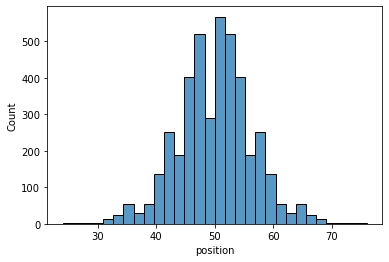

In [161]:
#position_data histplot
sns.histplot(position_data.query("position>0").position,bins=30)

In [177]:
position_data = clean_pos(position_data)
bk = get_bk(position_data, work_path)

100%|██████████████████████████████████████████████████████████████████████████████| 2111/2111 [03:20<00:00, 10.52it/s]


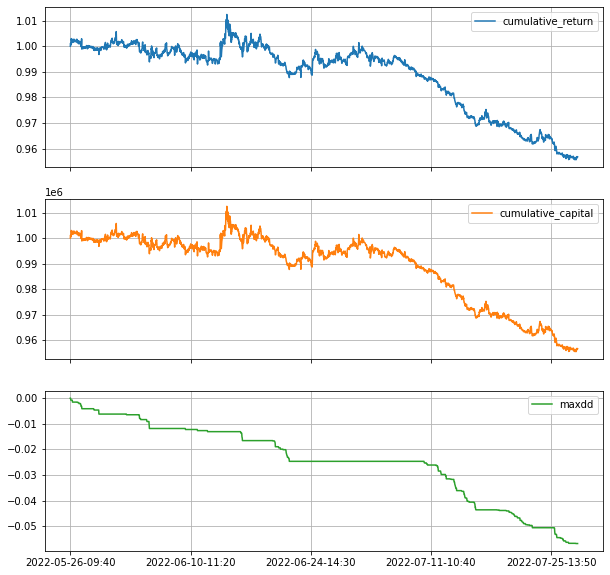

In [178]:
backtest_res_straddle,res_ts_straddle = backtest(bk, save_path, transaction_cost_b=1.3,transaction_cost_s=1.3,initial_capital=1e6)

100%|███████████████████████████████████████████████████████████████████████████████| 816/816 [00:03<00:00, 243.72it/s]


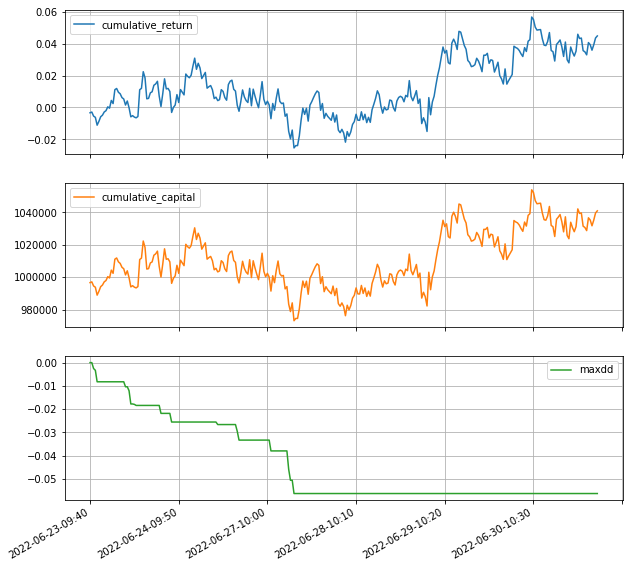

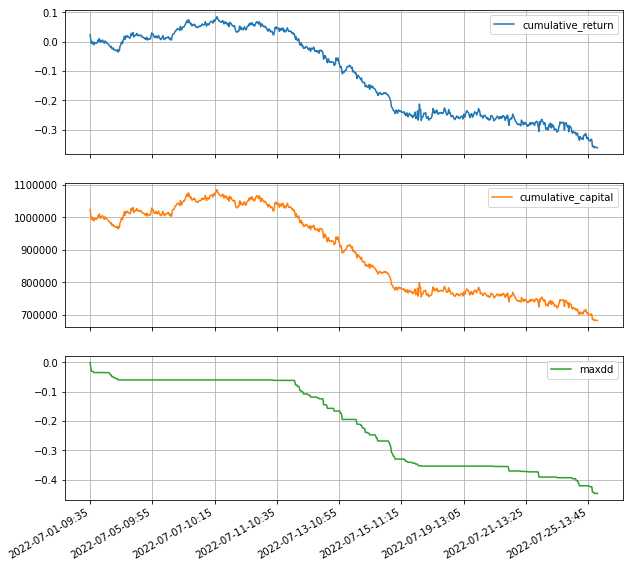

In [77]:
backtest_period(bk,save_path,transaction_cost=1.5,initial_capital=1e6,method = "month")

**greeks exposure**

In [147]:
df_straddle_greeks = greeks_exposure(position_data)

In [153]:
cash_greek_name = df_straddle_greeks.columns[df_straddle_greeks.columns.str.contains('cash')].tolist()

<AxesSubplot:xlabel='trade_time'>

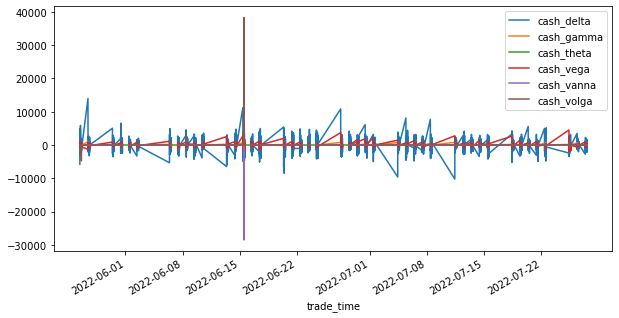

In [158]:
df_straddle_greeks.plot(y=cash_greek_name, figsize=(10, 5))

### long_volga

In [179]:
exp_name = 'strategy_long_volga' #策略名
strategy_data, work_path, current_time, save_path = get_strategy(exp_name)
position_data = get_position(strategy_data)

In [180]:
#position_data statistic metrics
position_data.position.describe()

count    78548.000000
mean         2.687529
std         11.369142
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         76.000000
Name: position, dtype: float64

<AxesSubplot:xlabel='position', ylabel='Count'>

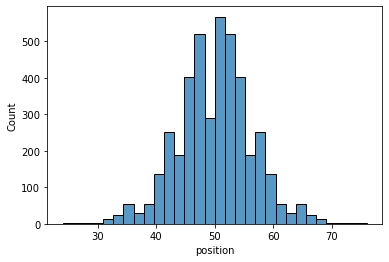

In [181]:
#position_data histplot
sns.histplot(position_data.query("position>0 | position < 0").position,bins=30)

In [182]:
position_data = clean_pos(position_data)
bk = get_bk(position_data, work_path)

100%|██████████████████████████████████████████████████████████████████████████████| 2111/2111 [03:05<00:00, 11.40it/s]


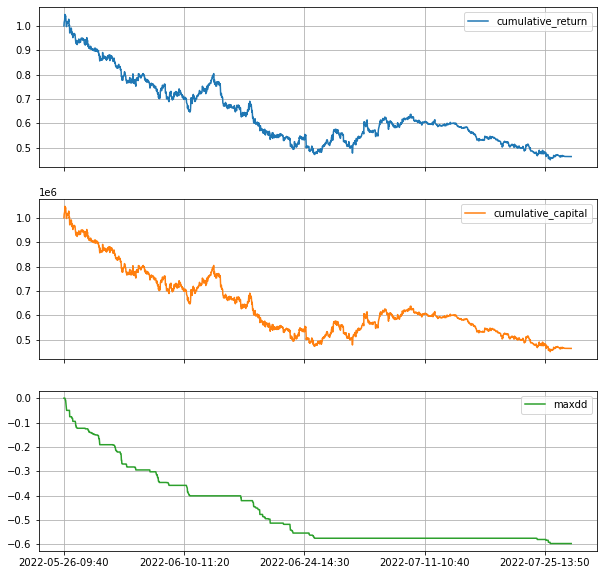

In [123]:
backtest_res_longvolga,res_ts_longvolga = backtest(bk, save_path, transaction_cost_b=1.3,transaction_cost_s=1.3,initial_capital=1e6)

**greeks exposure**

In [183]:
df_long_volga_greeks = greeks_exposure(position_data)

In [184]:
cash_greek_name = df_long_volga_greeks.columns[df_straddle_greeks.columns.str.contains('cash')].tolist()

<AxesSubplot:xlabel='trade_time'>

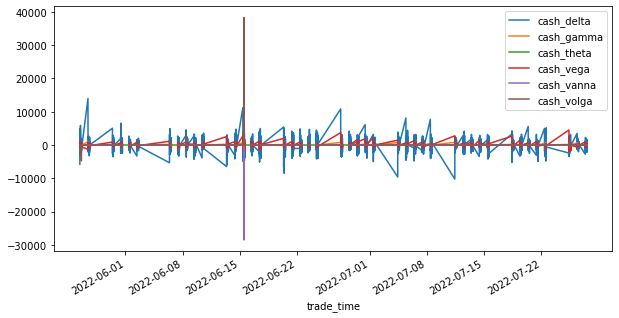

In [193]:
df_long_volga_greeks.plot(y=cash_greek_name, figsize=(10, 5))

### short_volga

In [114]:
exp_name = 'strategy_short_volga' #策略名
strategy_data, work_path, current_time, save_path = get_strategy(exp_name)
position_data = get_position(strategy_data)

In [115]:
#position_data statistic metrics
position_data.position.describe()

count    97776.000000
mean         2.207883
std         69.004107
min       -100.000000
25%          0.000000
50%          0.000000
75%         65.000000
max        100.000000
Name: position, dtype: float64

<AxesSubplot:xlabel='position', ylabel='Count'>

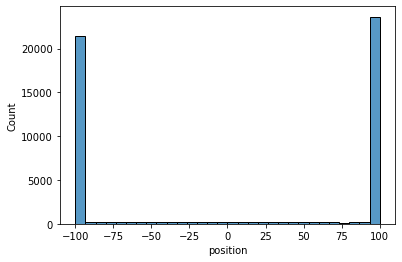

In [116]:
#position_data histplot
sns.histplot(position_data.query("position>0 | position < 0").position,bins=30)

In [117]:
position_data = clean_pos(position_data)
bk = get_bk(position_data, work_path)

100%|██████████████████████████████████████████████████████████████████████████████| 2111/2111 [03:13<00:00, 10.93it/s]


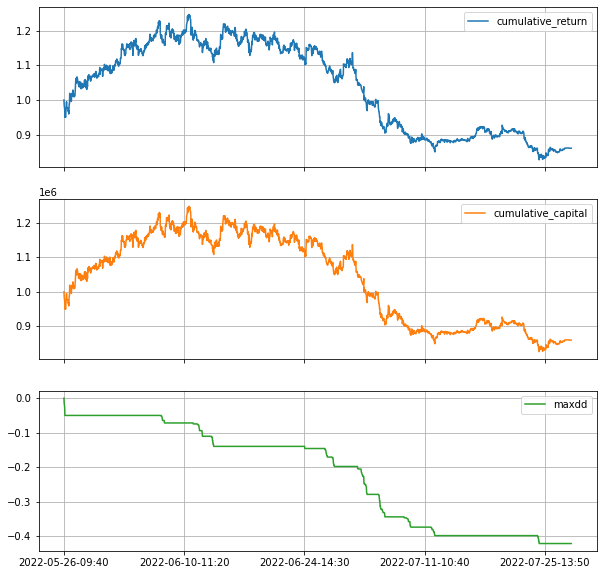

In [118]:
backtest_res_shortvolga,res_ts_shortvolga = backtest(bk, save_path, transaction_cost_b=1.3,transaction_cost_s=1.3,initial_capital=1e6)

### long_theta

In [108]:
exp_name = 'strategy_theta' #策略名
strategy_data, work_path, current_time, save_path = get_strategy(exp_name)
position_data = get_position(strategy_data)

In [109]:
#position_data statistic metrics
position_data.position.describe()

count    97776.000000
mean         2.207791
std         68.947061
min       -100.000000
25%          0.000000
50%          0.000000
75%         63.000000
max        100.000000
Name: position, dtype: float64

<AxesSubplot:xlabel='position', ylabel='Count'>

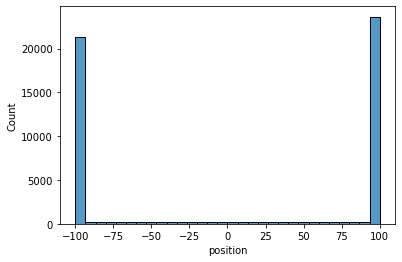

In [110]:
#position_data histplot
sns.histplot(position_data.query("position>0 | position < 0").position,bins=30)

In [112]:
position_data = clean_pos(position_data)
bk = get_bk(position_data, work_path)

100%|██████████████████████████████████████████████████████████████████████████████| 2111/2111 [02:55<00:00, 12.03it/s]


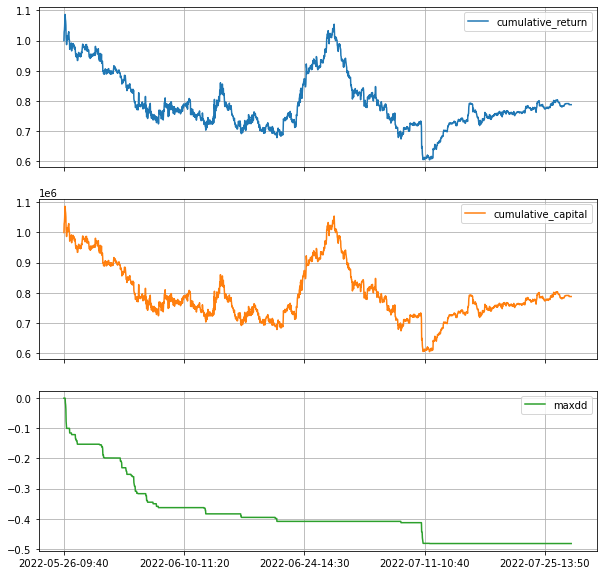

In [113]:
backtest_res_shortvolga,res_ts_shortvolga = backtest(bk, save_path, transaction_cost_b=1.3,transaction_cost_s=1.3,initial_capital=1e6)